In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
train_csv_path = '/workspace/data/train.csv'
meta_csv_path = '/workspace/data/meta.csv'
train_img_path = '/workspace/data/train'
test_img_path = '/workspace/data/test'


# CSV Î∂àÎü¨Ïò§Í∏∞
df_train = pd.read_csv(train_csv_path)
df_meta = pd.read_csv(meta_csv_path)

print(df_train.head())
print(df_meta.head())



                     ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16
   target                                         class_name
0       0                                     account_number
1       1  application_for_payment_of_pregnancy_medical_e...
2       2                                      car_dashboard
3       3            confirmation_of_admission_and_discharge
4       4                                          diagnosis


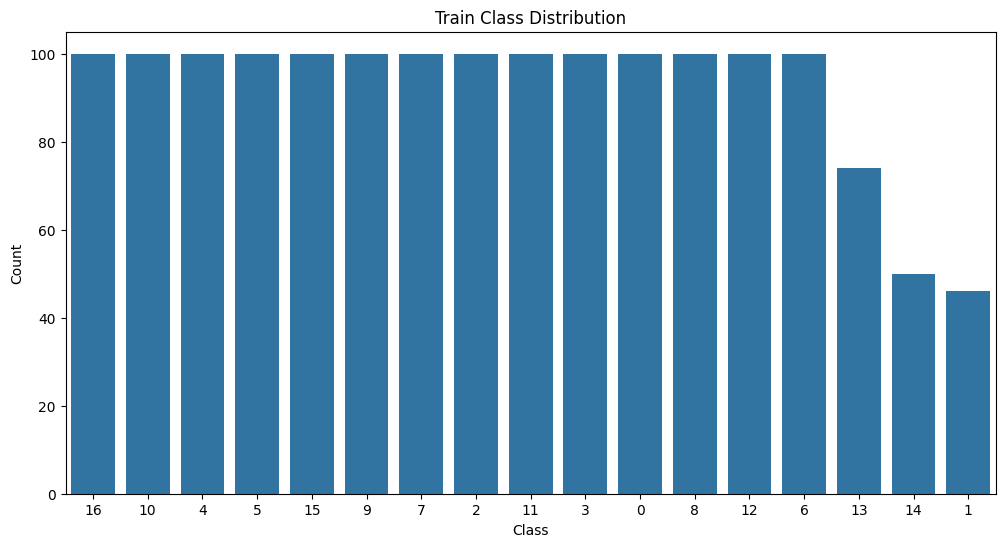

In [8]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='target', order=df_train['target'].value_counts().index)
plt.title('Train Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

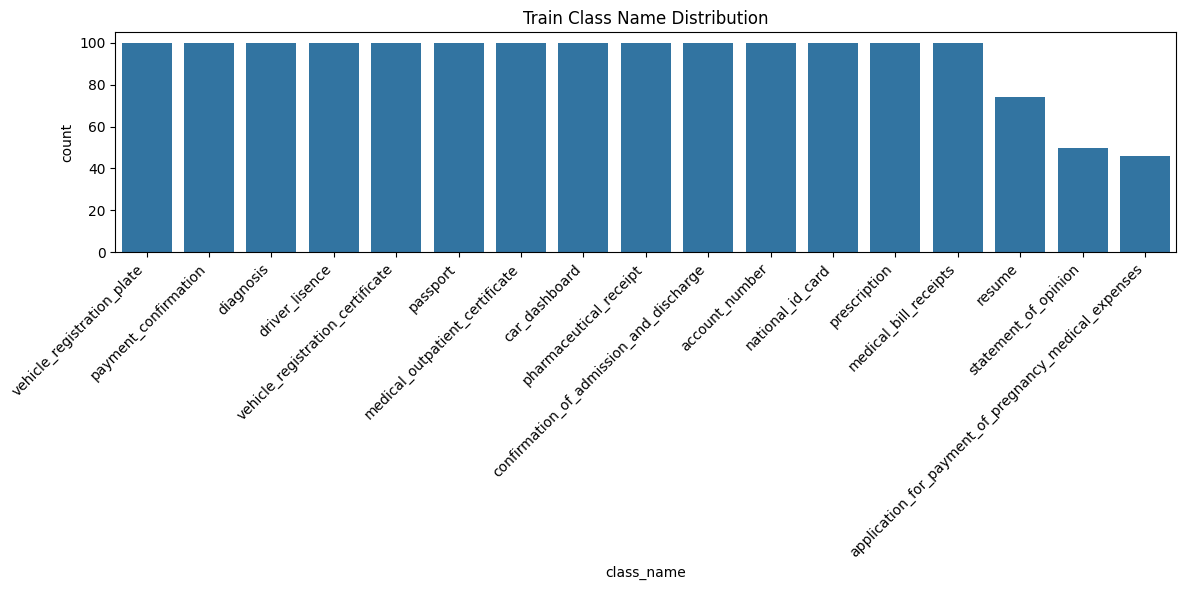

In [9]:
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÍ≥º Îß§Ìïë
class_mapping = dict(zip(df_meta['target'], df_meta['class_name']))
df_train['class_name'] = df_train['target'].map(class_mapping)

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏúºÎ°úÎèÑ ÌôïÏù∏
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='class_name', order=df_train['class_name'].value_counts().index)
plt.title('Train Class Name Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

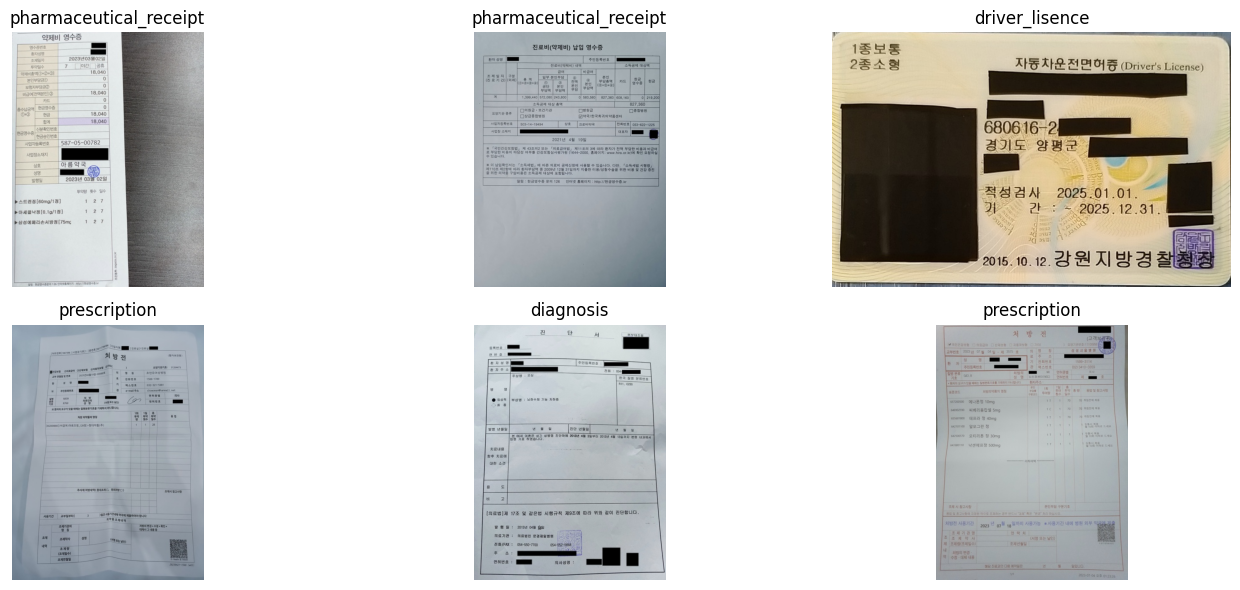

In [11]:
import random

def show_random_images(df, img_dir, n=6):
    samples = df.sample(n)
    plt.figure(figsize=(15, 6))
    for i, (img_id, label) in enumerate(zip(samples['ID'], samples['class_name'])):
        img = Image.open(os.path.join(img_dir, img_id))
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_images(df_train, train_img_path)

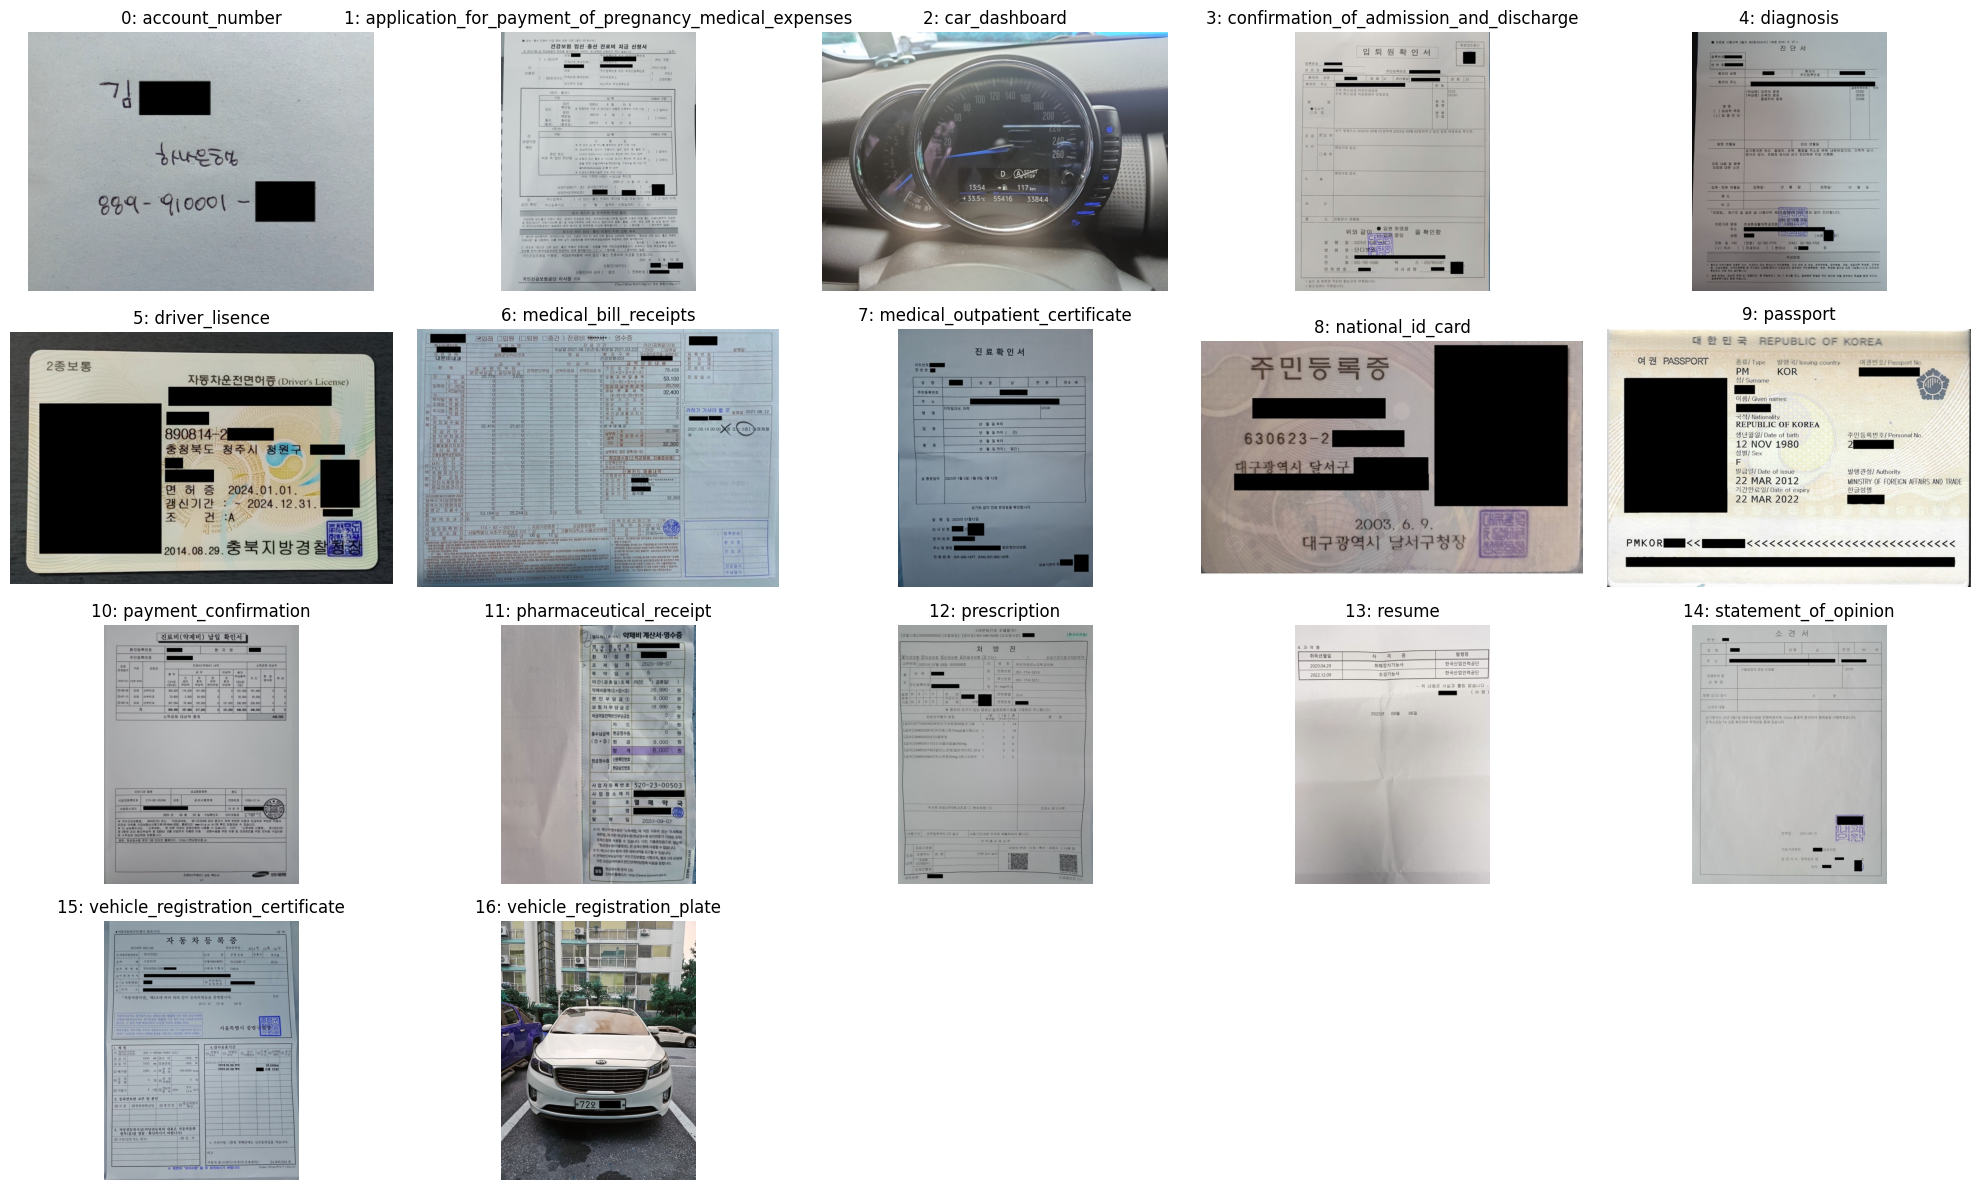

In [14]:
def show_one_per_class(df, img_dir):
    plt.figure(figsize=(20, 12))
    for i in range(17):
        sample = df[df['target'] == i].iloc[0]
        img = Image.open(os.path.join(img_dir, sample['ID']))
        plt.subplot(4, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{i}: {class_mapping[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_one_per_class(df_train, train_img_path)

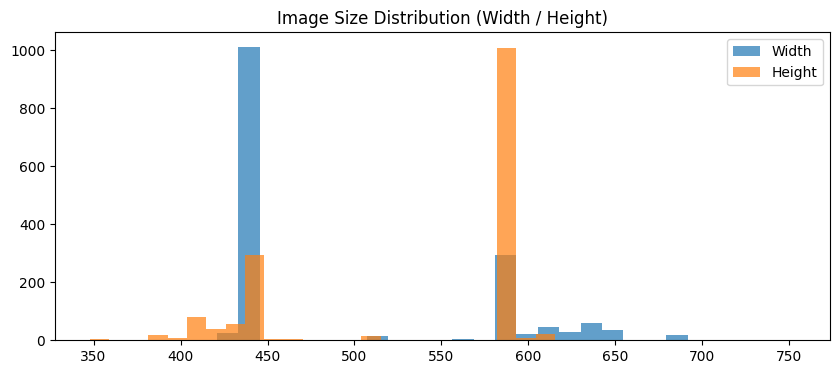

In [15]:
def get_image_sizes(df, img_dir):
    sizes = []
    for img_id in df['ID']:
        img = Image.open(os.path.join(img_dir, img_id))
        sizes.append(img.size)  # (width, height)
    return sizes

sizes = get_image_sizes(df_train, train_img_path)
widths, heights = zip(*sizes)

plt.figure(figsize=(10, 4))
plt.hist(widths, bins=30, alpha=0.7, label='Width')
plt.hist(heights, bins=30, alpha=0.7, label='Height')
plt.legend()
plt.title('Image Size Distribution (Width / Height)')
plt.show()

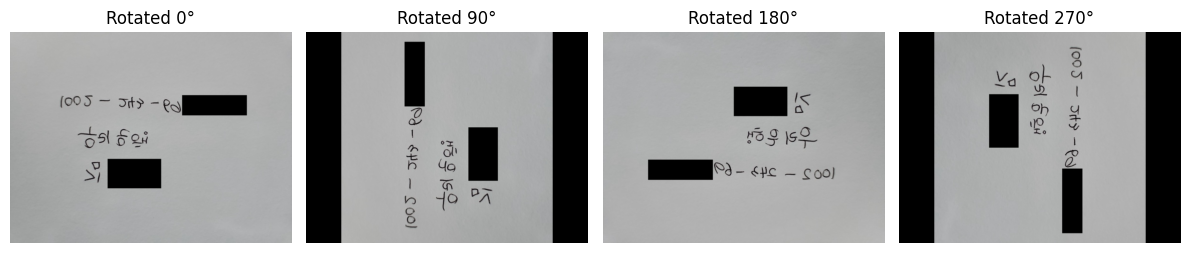

In [21]:
def show_rotated_images(img_path):
    img = Image.open(img_path)
    angles = [0, 90, 180, 270]
    plt.figure(figsize=(12, 3))
    for i, angle in enumerate(angles):
        rotated = img.rotate(angle)
        plt.subplot(1, 4, i+1)
        plt.imshow(rotated, cmap='gray')
        plt.title(f"Rotated {angle}¬∞")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

sample_img = os.path.join(test_img_path, random.choice(os.listdir(test_img_path)))
show_rotated_images(sample_img)


- ### Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Î≥Ñ ÎπàÎèÑÏàò

In [27]:
from PIL import Image
import os
from collections import Counter

# Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï†ïÎ≥¥ ÏàòÏßë Ìï®Ïàò
def collect_image_sizes(img_dir, df):
    size_list = []
    for img_name in df['ID']:
        img_path = os.path.join(img_dir, img_name)
        with Image.open(img_path) as img:
            size_list.append(img.size)  # (width, height)
    return size_list

# Ïã§Ìñâ
img_sizes = collect_image_sizes(train_img_path, df_train)

# ÎπàÎèÑÏàò ÏßëÍ≥Ñ
size_counter = Counter(img_sizes)

# Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ìï¥ÏÉÅÎèÑ Top 10 Ï∂úÎ†•
print("Í∞ÄÏû• ÌùîÌïú Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ Top 10:")
for size, count in size_counter.most_common(10):
    print(f"{size[0]}x{size[1]} : {count}Ïû•")


Í∞ÄÏû• ÌùîÌïú Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ Top 10:
443x591 : 1004Ïû•
591x443 : 282Ïû•
682x384 : 18Ïû•
608x430 : 10Ïû•
643x407 : 8Ïû•
641x408 : 7Ïû•
644x406 : 6Ïû•
512x512 : 6Ïû•
634x413 : 6Ïû•
638x410 : 5Ïû•


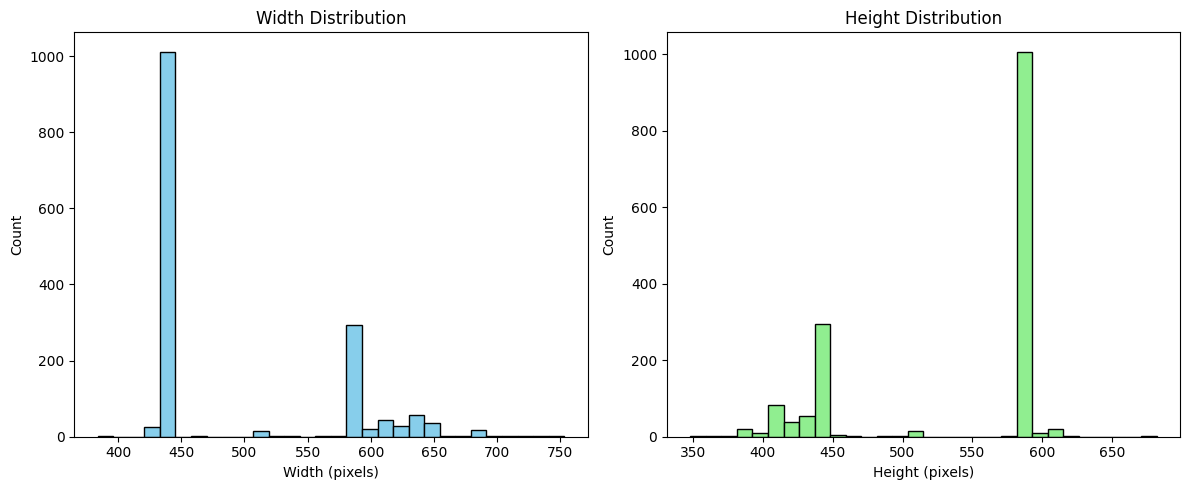

In [26]:
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨
widths, heights = zip(*img_sizes)

plt.figure(figsize=(12, 5))

# Í∞ÄÎ°ú Í∏∏Ïù¥ Î∂ÑÌè¨
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')

# ÏÑ∏Î°ú Í∏∏Ïù¥ Î∂ÑÌè¨
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='lightgreen', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [28]:
from collections import defaultdict

# ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï†ÄÏû•
class_size_dict = defaultdict(list)

for _, row in df_train.iterrows():
    img_path = os.path.join(train_img_path, row['ID'])
    target = row['target']
    with Image.open(img_path) as img:
        size = img.size  # (width, height)
        class_size_dict[target].append(size)


In [29]:
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Îß§Ìïë
class_mapping = dict(zip(df_meta['target'], df_meta['class_name']))

print("üìè ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ:")
for target, sizes in class_size_dict.items():
    widths = [s[0] for s in sizes]
    heights = [s[1] for s in sizes]
    avg_w, avg_h = sum(widths) / len(widths), sum(heights) / len(heights)
    print(f"{target:2d} ({class_mapping[target][:30]:>30}) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: {int(avg_w)}x{int(avg_h)}  (ÏÉòÌîå Ïàò: {len(sizes)})")


üìè ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ:
16 (    vehicle_registration_plate) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 475x558  (ÏÉòÌîå Ïàò: 100)
10 (          payment_confirmation) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 443x591  (ÏÉòÌîå Ïàò: 100)
 4 (                     diagnosis) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 443x591  (ÏÉòÌîå Ïàò: 100)
 5 (                driver_lisence) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 611x431  (ÏÉòÌîå Ïàò: 100)
15 (vehicle_registration_certifica) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 444x589  (ÏÉòÌîå Ïàò: 100)
14 (          statement_of_opinion) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 443x591  (ÏÉòÌîå Ïàò: 50)
 9 (                      passport) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 608x432  (ÏÉòÌîå Ïàò: 100)
13 (                        resume) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 443x590  (ÏÉòÌîå Ïàò: 74)
 7 (medical_outpatient_certificate) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 443x591  (ÏÉòÌîå Ïàò: 100)
11 (        pharmaceutical_receipt) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 519x514  (ÏÉòÌîå Ïàò: 100)
 2 (                 car_dashboard) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞: 588x445  (ÏÉòÌîå Ïàò: 100)
 8 (              national_id_card) ‚ûú ÌèâÍ∑† ÌÅ¨Í∏∞:

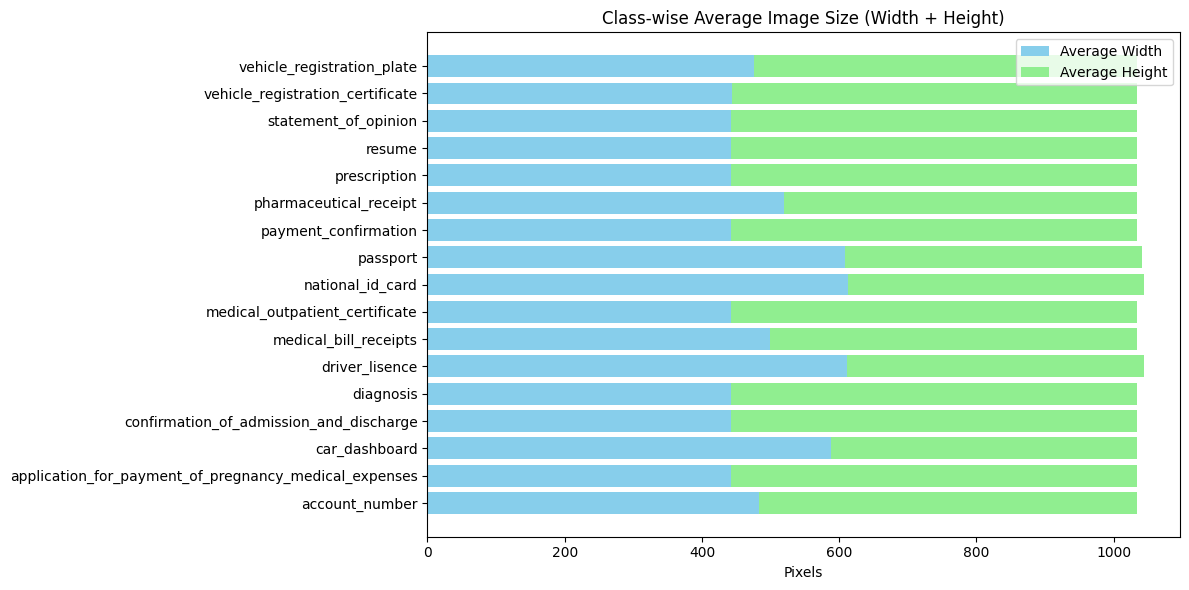

In [30]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
avg_widths = []
avg_heights = []
labels = []

for target in sorted(class_size_dict.keys()):
    sizes = class_size_dict[target]
    widths = [s[0] for s in sizes]
    heights = [s[1] for s in sizes]
    avg_widths.append(sum(widths)/len(widths))
    avg_heights.append(sum(heights)/len(heights))
    labels.append(class_mapping[target])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.barh(labels, avg_widths, color='skyblue', label='Average Width')
plt.barh(labels, avg_heights, left=avg_widths, color='lightgreen', label='Average Height')
plt.xlabel('Pixels')
plt.title('Class-wise Average Image Size (Width + Height)')
plt.legend()
plt.tight_layout()
plt.show()


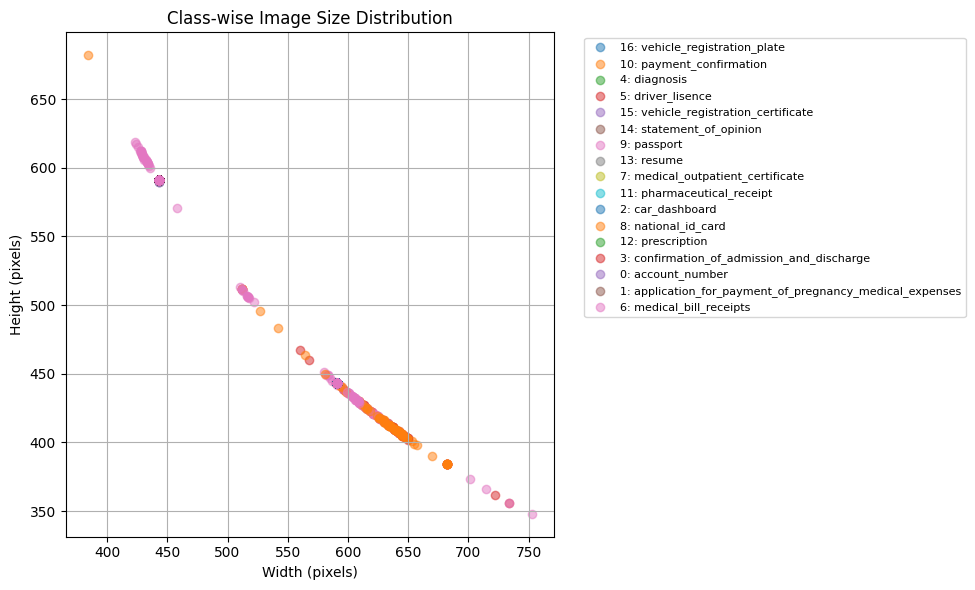

In [31]:
plt.figure(figsize=(10, 6))

for target, sizes in class_size_dict.items():
    widths = [s[0] for s in sizes]
    heights = [s[1] for s in sizes]
    plt.scatter(widths, heights, label=f"{target}: {class_mapping[target]}", alpha=0.5)

plt.title('Class-wise Image Size Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
from collections import defaultdict, Counter

# ÌÅ¥ÎûòÏä§Î≥Ñ Ìï¥ÏÉÅÎèÑ Counter Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
class_resolution_counter = defaultdict(Counter)

# Ìï¥ÏÉÅÎèÑ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
for _, row in df_train.iterrows():
    target = row['target']
    img_path = os.path.join(train_img_path, row['ID'])
    with Image.open(img_path) as img:
        size = img.size  # (width, height)
        class_resolution_counter[target][size] += 1


In [33]:
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Îß§Ìïë
class_mapping = dict(zip(df_meta['target'], df_meta['class_name']))

# Ìï¥ÏÉÅÎèÑ Î∂ÑÌè¨ Ï∂úÎ†•
for target in sorted(class_resolution_counter.keys()):
    print(f"\nüìÑ ÌÅ¥ÎûòÏä§ {target}: {class_mapping[target]}")
    for (w, h), count in class_resolution_counter[target].most_common():
        print(f"  {w}x{h}  :  {count}Ïû•")



üìÑ ÌÅ¥ÎûòÏä§ 0: account_number
  443x591  :  72Ïû•
  591x443  :  27Ïû•
  443x590  :  1Ïû•

üìÑ ÌÅ¥ÎûòÏä§ 1: application_for_payment_of_pregnancy_medical_expenses
  443x591  :  46Ïû•

üìÑ ÌÅ¥ÎûòÏä§ 2: car_dashboard
  591x443  :  98Ïû•
  443x591  :  2Ïû•

üìÑ ÌÅ¥ÎûòÏä§ 3: confirmation_of_admission_and_discharge
  443x591  :  100Ïû•

üìÑ ÌÅ¥ÎûòÏä§ 4: diagnosis
  443x591  :  100Ïû•

üìÑ ÌÅ¥ÎûòÏä§ 5: driver_lisence
  591x443  :  21Ïû•
  443x591  :  6Ïû•
  638x410  :  4Ïû•
  641x408  :  4Ïû•
  637x411  :  4Ïû•
  646x405  :  3Ïû•
  642x407  :  3Ïû•
  643x407  :  3Ïû•
  682x384  :  3Ïû•
  629x416  :  2Ïû•
  626x418  :  2Ïû•
  639x409  :  2Ïû•
  613x427  :  2Ïû•
  620x422  :  2Ïû•
  644x406  :  2Ïû•
  650x403  :  2Ïû•
  512x512  :  2Ïû•
  590x443  :  2Ïû•
  633x414  :  1Ïû•
  568x460  :  1Ïû•
  636x412  :  1Ïû•
  597x438  :  1Ïû•
  634x412  :  1Ïû•
  650x402  :  1Ïû•
  610x429  :  1Ïû•
  645x406  :  1Ïû•
  608x430  :  1Ïû•
  649x403  :  1Ïû•
  642x408  :  1Ïû•
  630x415  :  1Ïû•
  634x4

### Ï†ïÎ¶¨
#### Ìï¥ÏÉÅÎèÑ Í≥†Ï†ï: 
- ÌÅ¥ÎûòÏä§ 1: application_for_payment_of_pregnancy_medical_expenses (ÏûÑÏã† Ï∂úÏÇ∞ ÏßÑÎ£åÎπÑ ÏßÄÍ∏â Ïã†Ï≤≠ÏÑú)
- ÌÅ¥ÎûòÏä§ 3: confirmation_of_admission_and_discharge (ÏûÖÌá¥Ïõê ÌôïÏù∏ÏÑú)
- ÌÅ¥ÎûòÏä§ 4: diagnosis (ÏßÑÎã®ÏÑú)
- ÌÅ¥ÎûòÏä§ 7: medical_outpatient_certificate (Ïô∏Îûò Ï¶ùÎ™ÖÏÑú)
- ÌÅ¥ÎûòÏä§ 10: payment_confirmation (Í≤∞Ï†ú Ï¶ùÎ™ÖÏÑú)
- ÌÅ¥ÎûòÏä§ 12: prescription (Ï≤òÎ∞©Ï†Ñ)
- ÌÅ¥ÎûòÏä§ 14: statement_of_opinion (ÏùòÍ≤¨ÏÑú)

#### Ìï¥ÏÉÅÎèÑ Îã§Ïñë:
- ÌÅ¥ÎûòÏä§ 5: driver_lisence (Ïö¥Ï†ÑÎ©¥ÌóàÏ¶ù)
- ÌÅ¥ÎûòÏä§ 6: medical_bill_receipts (ÏùòÎ£å ÏòÅÏàòÏ¶ù)
- ÌÅ¥ÎûòÏä§ 8: national_id_card (Ï£ºÎØºÎì±Î°ùÏ¶ù)
- ÌÅ¥ÎûòÏä§ 9: passport (Ïó¨Í∂å)

#### ÎÇòÎ®∏ÏßÄ:
- ÌÅ¥ÎûòÏä§ 0: account_number  -> 3 Í∞ÄÏßÄ (Í≥ÑÏ¢åÎ≤àÌò∏)
- ÌÅ¥ÎûòÏä§ 2: car_dashboard   -> 2 Í∞ÄÏßÄ (ÏûêÎèôÏ∞® ÎåÄÏãúÎ≥¥Îìú)
- ÌÅ¥ÎûòÏä§ 11: pharmaceutical_receipt -> 2 Í∞ÄÏßÄ (ÏïΩÍµ≠ ÏòÅÏàòÏ¶ù)
- ÌÅ¥ÎûòÏä§ 13: resume -> 2 Í∞ÄÏßÄ (Ïù¥Î†•ÏÑú)
- ÌÅ¥ÎûòÏä§ 15: vehicle_registration_certificate -> 3 Í∞ÄÏßÄ (Ï∞®Îüâ Îì±Î°ùÏ¶ù)
- ÌÅ¥ÎûòÏä§ 16: vehicle_registration_plate -> 2 Í∞ÄÏßÄ (ÏûêÎèôÏ∞® Î≤àÌò∏Ìåê)

#### Ï†ÑÎûµ:
- Resize
- ÌÅ¥ÎûòÏä§ 5,6,8,9 paddingÏ≤òÎ¶¨
- TTA

## Test Îç∞Ïù¥ÌÑ∞ ÏÖã EDA

In [34]:
from collections import Counter
from PIL import Image
import os

# test Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ ÏàòÏßë
def get_test_image_sizes(test_img_path):
    sizes = []
    for img_name in os.listdir(test_img_path):
        img_path = os.path.join(test_img_path, img_name)
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (width, height)
    return sizes

# Ïã§Ìñâ
test_sizes = get_test_image_sizes(test_img_path)
test_size_counter = Counter(test_sizes)


In [35]:
print("üì¶ test Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ Top 20")
for (w, h), count in test_size_counter.most_common(20):
    print(f"{w}x{h} : {count}Ïû•")


üì¶ test Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ Top 20
443x591 : 1342Ïû•
591x443 : 1270Ïû•
512x512 : 22Ïû•
430x608 : 20Ïû•
608x430 : 12Ïû•
639x409 : 8Ïû•
682x384 : 8Ïû•
417x627 : 8Ïû•
384x682 : 8Ïû•
413x634 : 7Ïû•
642x408 : 7Ïû•
646x405 : 7Ïû•
634x413 : 7Ïû•
648x404 : 6Ïû•
428x611 : 6Ïû•
645x406 : 6Ïû•
611x428 : 6Ïû•
409x640 : 6Ïû•
443x590 : 6Ïû•
407x643 : 6Ïû•


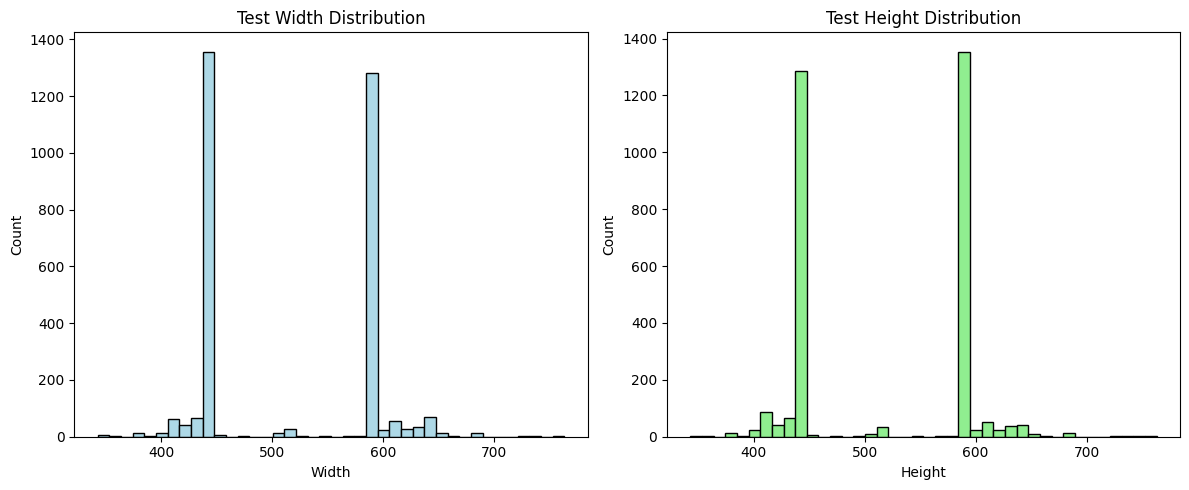

In [36]:
import matplotlib.pyplot as plt

# ÎÑàÎπÑ, ÎÜíÏù¥ Î∂ÑÎ¶¨
test_widths, test_heights = zip(*test_sizes)

plt.figure(figsize=(12, 5))

# ÎÑàÎπÑ Î∂ÑÌè¨
plt.subplot(1, 2, 1)
plt.hist(test_widths, bins=40, color='lightblue', edgecolor='black')
plt.title('Test Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

# ÎÜíÏù¥ Î∂ÑÌè¨
plt.subplot(1, 2, 2)
plt.hist(test_heights, bins=40, color='lightgreen', edgecolor='black')
plt.title('Test Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


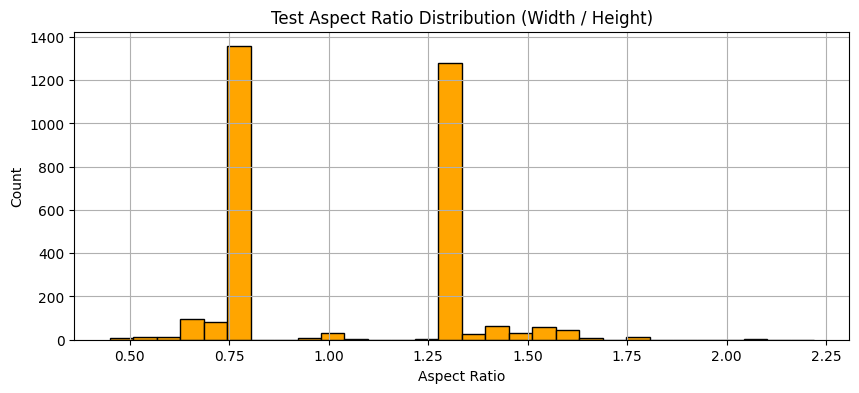

In [37]:
# ÎπÑÏú® Í≥ÑÏÇ∞ (ÏÜåÏà´Ï†ê 2ÏûêÎ¶¨ÍπåÏßÄ)
aspect_ratios = [round(w / h, 2) for w, h in test_sizes]

plt.figure(figsize=(10, 4))
plt.hist(aspect_ratios, bins=30, color='orange', edgecolor='black')
plt.title('Test Aspect Ratio Distribution (Width / Height)')
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')
plt.grid(True)
plt.show()


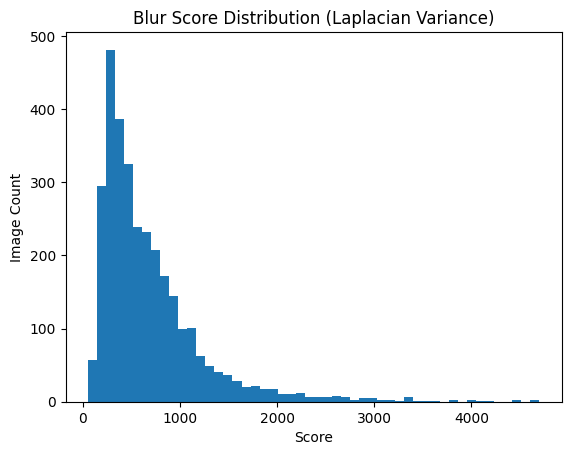

In [40]:
import cv2
import numpy as np

def estimate_blur(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return -1
    lap = cv2.Laplacian(img, cv2.CV_64F).var()
    return lap  # ÎÇÆÏùÑÏàòÎ°ù blur

blur_scores = []
for img_name in os.listdir(test_img_path):
    path = os.path.join(test_img_path, img_name)
    blur_scores.append(estimate_blur(path))

plt.hist(blur_scores, bins=50)
plt.title("Blur Score Distribution (Laplacian Variance)")
plt.xlabel("Score")
plt.ylabel("Image Count")
plt.show()
